In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Topics Covered in this notebook
1. Handling missing data
2. Handling of Categorical Data
3. Splitting the dataset into training and testing datasets
4. Feature Scaling(Standardization and Normailzation), Min max scaler
5. One-Hot Encoding
6. Multicollinearity
7. Min max scaler
8. Handling Imbalance dataset
9. Dimensionality Reduction with Principal Component Analysis
10. Label Encoding

In [7]:
data = pd.read_csv("/Users/abhinavrohilla/Downloads/GRE PREP/titanic/train.csv")

In [8]:
data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Handling missing data

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000


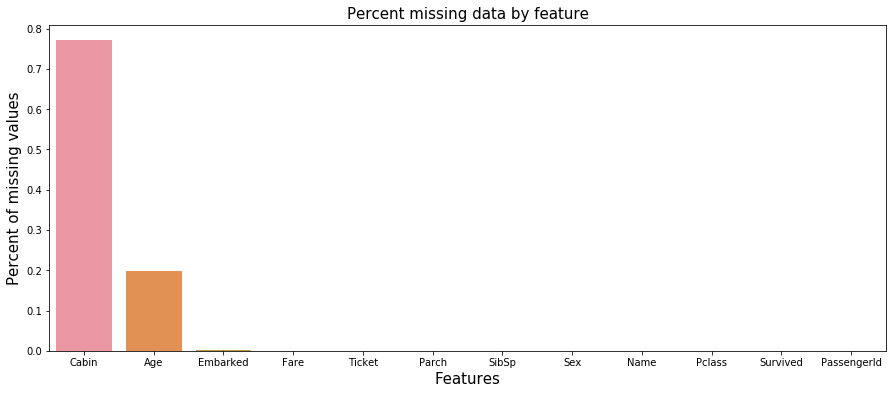

In [9]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
plt.subplots(figsize=(15, 6))
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

Stuff to do with missing data-

1. Ignore the data row
2. Back-fill or forward-fill to propagate next or previous values respectively
3. Replace with mean, median value
4. Matrix Factorization

In [10]:
#Ignoring data
def dropping_data(data,drop_type):
    if drop_type == 'a':
        # Will drop all rows that have any missing values.
        data.dropna(inplace=True)
    elif drop_type == 'b':
        #drop the rows only if all of the values in the row are missing.
        data.dropna(how='all',inplace=True)
    elif drop_type == 'c':
        #drop a column (variable) that has missing values.
        data.dropna(axis=1,inplace=True)
    elif drop_type == 'd':
        #drop a column (variable) that has missing values.
        data.dropna(thresh=4,inplace=True)
    else:
        return data

In [11]:
dropping_data(data,'d')

**BACK FILL**




In [12]:
data.fillna(method='bfill',inplace=True)



**FOWARD FILL**

In [13]:
data.fillna(method='ffill',inplace=True)

data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S
5,6,0,3,"Moran, Mr. James",male,54.0,0,0,330877,8.4583,E46,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,G6,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,G6,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,G6,C


**REPLACE WITH MEAN, MEDIAN VALUE**

In [14]:

"""
1. Replace nan with Mean when there are no outliers
2. Replace nan with Median when there are outliers
Its because mean with outliers will not be the actual mean it may shift mean biased towards outliers.
"""
data['Age'].fillna(data['Age'].mean(),inplace=True)

data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S
5,6,0,3,"Moran, Mr. James",male,54.0,0,0,330877,8.4583,E46,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,G6,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,G6,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,G6,C


#Note

NaN value will remain even after forward filling or back filling if a next or previous value isn’t available or it is also a NaN value.

FIND AND REMOVE OUTLIERS

1. Plotting data (Box plots, Scatter plot, Histograms)
2. Z-score
3. interquartile range

# Interquartile range
Q1 = median of values lesser than median

Q2 = Median

Q3 = median of values greater than median

IQR = Q3 - Q1

In [0]:
age_median = data['Age'].median()

In [0]:
Q1 = data[data['Age']<=age_median]['Age'].median()
Q3 = data[data['Age']>=age_median]['Age'].median()

In [0]:
IQR = Q3 - Q1

In [0]:
IQR

18.0

In [0]:
#This is to increse IQR range
IQR_range = 1.5

In [0]:
data['Age_removing_outliers'] = data[~((data['Age'] < (Q1 - IQR_range * IQR)) | (data['Age'] > (Q3 + IQR_range * IQR)))]['Age']

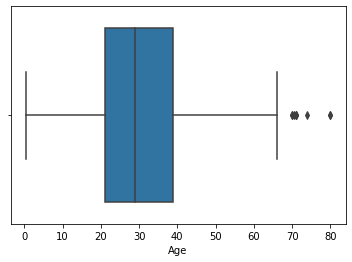

In [0]:
sns.boxplot(x=data["Age"])

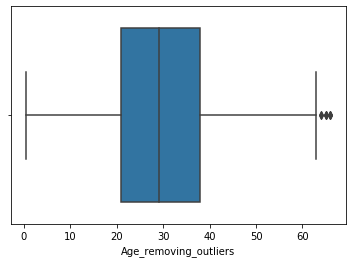

In [0]:
sns.boxplot(x=data["Age_removing_outliers"])

# Handling Categorical data

Encoding the Categorical Data using 


1. Label Encoder
2. One Hot encoding

Why use encoder?

we can’t have text in our data if we’re going to run any kind of model on it. So before we can run a model, we need to covert it into numerical values as it can be represented in dimensions and that's what model needs.

In [0]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_removing_outliers
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S,35.0


In [0]:
#count of distinct values in column
data['Embarked'].value_counts(dropna=False)

S    645
C    169
Q     77
Name: Embarked, dtype: int64

In [0]:
#can also get count on contineous variable
#In this it shows maximum people age is between 23 to 34
data['Age'].value_counts(bins=7)

(23.157, 34.526]    287
(11.789, 23.157]    212
(34.526, 45.894]    182
(0.339, 11.789]      87
(45.894, 57.263]     84
(57.263, 68.631]     30
(68.631, 80.0]        9
Name: Age, dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

**Label Encoding**


Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated.


In [0]:
labelencoder= LabelEncoder()

In [0]:
data['Embarked_encoded'] = labelencoder.fit_transform(list(data['Embarked']))

In [0]:
data['Embarked_encoded'].value_counts()

2    645
0    169
1     77
Name: Embarked_encoded, dtype: int64

**ONE HOT ENCODER**


It refers to splitting the column which contains numerical categorical data to many columns depending on the number of categories present in that column. Each column contains “0” or “1” corresponding to which column it has been placed.

In [0]:
data[['is_C','is_Q','is_S']] = pd.get_dummies(data['Embarked'])

In [0]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_removing_outliers,Embarked_encoded,is_C,is_Q,is_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,22.0,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S,26.0,2,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S,35.0,2,0,0,1


There's a huge disadvantage using Label encoder over One hot encoder

numerical value in misleading.

# Feature Scaling

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing.

Why Feature scaling?

1. If the feature is not meaningful and varies a lot in its values, it may lead to poor predictions,
It is really important to understand when use normalization and when not. So if the the feature is important which means it has very high correlation with the predicted values, we dont want to loose that information applying normalization on it.
2. Gradient descent takes longer time to caluclate weights on higher values.
3. Algorithms like K-means, KNN, PCA etc requires feature scaling.

In [0]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_removing_outliers,Embarked_encoded,is_C,is_Q,is_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,22.0,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S,26.0,2,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S,35.0,2,0,0,1
5,6,0,3,"Moran, Mr. James",male,54.0,0,0,330877,8.4583,E46,Q,54.0,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.0,2,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,G6,S,2.0,2,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,G6,S,27.0,2,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,G6,C,14.0,0,1,0,0


In [0]:
data['Fare'].min(),data['Fare'].max()

(0.0, 512.3292)

It can be seen that "Fare" needs to be normalized as it values vary between 0-512.
Ideally they should be varied between

-3<x<3

In [0]:
data['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [0]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_removing_outliers,Embarked_encoded,is_C,is_Q,is_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,22.0,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S,26.0,2,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S,35.0,2,0,0,1
5,6,0,3,"Moran, Mr. James",male,54.0,0,0,330877,8.4583,E46,Q,54.0,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.0,2,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,G6,S,2.0,2,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,G6,S,27.0,2,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,G6,C,14.0,0,1,0,0


**MIN-MAX NORMALISATION**

 This technique re-scales a feature or observation value with distribution value between 0 and 1.


In [0]:
from google.colab import files
uploaded = files.upload()

Saving Data_for_Missing_Values.csv to Data_for_Missing_Values.csv


In [0]:
data_set = pd.read_csv("Data_for_Missing_Values.csv")

In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Sklearn library  
from sklearn import preprocessing

data_set.head() 
  
# here Features - Age and Salary columns  
# are taken using slicing 
# to handle values with varying magnitude 
x = data_set.iloc[:, 1:3].values 
print ("\nOriginal data values : \n",  x) 

""" MIN MAX SCALER """
  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
  
# Scaled feature 
x_after_min_max_scaler = min_max_scaler.fit_transform(x) 
  
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler) 


Original data values : 
 [[4.4e+01 7.2e+04]
 [2.7e+01 4.8e+04]
 [3.0e+01 5.4e+04]
 [3.8e+01 6.1e+04]
 [4.0e+01     nan]
 [3.5e+01 5.8e+04]
 [    nan 5.2e+04]
 [4.8e+01 7.9e+04]
 [5.0e+01 8.3e+04]
 [3.7e+01 6.7e+04]]

After min max Scaling : 
 [[0.73913043 0.68571429]
 [0.         0.        ]
 [0.13043478 0.17142857]
 [0.47826087 0.37142857]
 [0.56521739        nan]
 [0.34782609 0.28571429]
 [       nan 0.11428571]
 [0.91304348 0.88571429]
 [1.         1.        ]
 [0.43478261 0.54285714]]


**STANDARISATION**

In [0]:
""" Standardisation """
  
Standardisation = preprocessing.StandardScaler() 
  
# Scaled feature 
x_after_Standardisation = Standardisation.fit_transform(x) 
  
print ("\nAfter Standardisation : \n", x_after_Standardisation) 


After Standardisation : 
 [[ 0.71993143  0.71101276]
 [-1.62367514 -1.36437583]
 [-1.21009751 -0.84552869]
 [-0.10722383 -0.24020701]
 [ 0.16849459         nan]
 [-0.52080146 -0.49963059]
 [        nan -1.01847774]
 [ 1.27136827  1.31633443]
 [ 1.54708669  1.66223253]
 [-0.24508304  0.27864014]]


**Splitting the dataset into training and testing datasets**

train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually.

By default, Sklearn train_test_split will make random partitions for the two subsets. However, you can also specify a random state for the operation.

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
le = LabelEncoder()

ds = data.apply(le.fit_transform)
data = ds.values
y = data[:,0]
x = data[:,1:]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(712, 16) (712,)
(179, 16) (179,)


**Multicollinearity**
Multicollinearity (also collinearity) is a phenomenon in which two or more predictor variables (Independent variables) in a regression model are highly correlated, meaning that one can be linearly predicted from the others with a substantial degree of accuracy. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Collinearity is a linear association between two explanatory variables. Two variables are perfectly collinear if there is an exact linear relationship between them.
Types of multicollinearity:
There are two types of multicollinearity:
1. Structural multicollinearity is a mathematical artifact caused by creating new predictors from other predictors — such as, creating the predictor x2 from the predictor x.
2. Data-based multicollinearity, on the other hand, is a result of a poorly designed experiment, reliance on purely observational data, or the inability to manipulate the system on which the data are collected.


**Handling Imbalance dataset**

Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class. Class imbalance can be found in many different areas including medical diagnosis, spam filtering, and fraud detection.

In [0]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 163kB 8.1MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [0]:
# check version number
import imblearn
print(imblearn.__version__)

Using TensorFlow backend.


0.6.1


Counter({0: 9900, 1: 100})


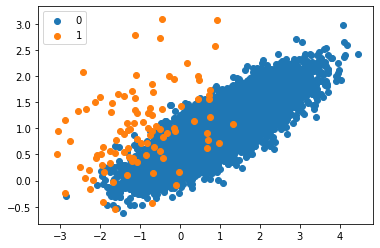

In [0]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

**Oversampling Minority Class**


Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don't have a ton of data to work with. A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

We will use the resampling module from Scikit-Learn to randomly replicate samples from the minority class.


Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


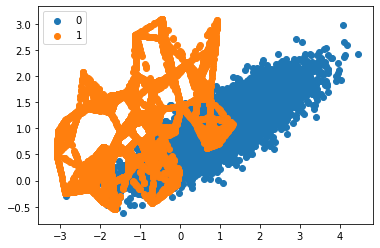

In [0]:

# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

**Undersampling Majority Class**


Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


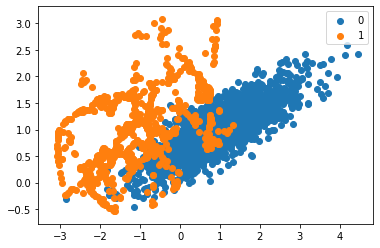

In [0]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

1. Feature Elimination
2. Feature Extraction

**Dimensionality Reduction with Principal Component Analysis**

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data

In [15]:
"""
Get knowledge of
1. Variance
2. Co-variance matrix
3. Eigen vectors and Eigen values
"""

'\nGet knowledge of\n1. Variance\n2. Co-variance matrix\n3. Eigen vectors and Eigen values\n'

In [ ]:
#variance co-variance matrix -> "https://www.youtube.com/watch?v=G16c2ZODcg8"

In [ ]:
#Disadvantage of feature elimination - you gain no information from those variables you’ve dropped

"""Feature Extraction - we create ten “new” independent variables, where each “new” 
independent variable is a combination of each of the ten “old” independent variables"""

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

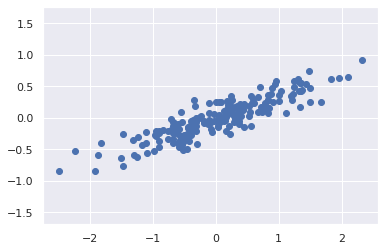

In [0]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [0]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


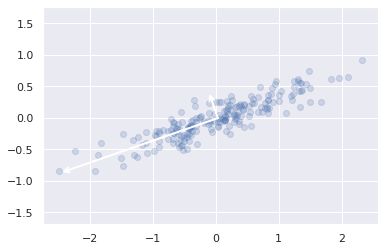

In [0]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [0]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


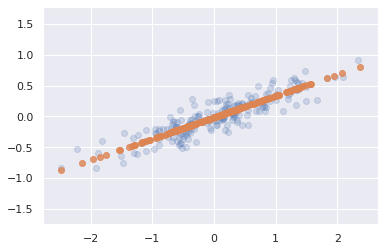

In [0]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');